<div style="display: flex; background-color: RGB(255,154,100);" >
  <h1 style="margin: auto; padding: 30px; text-align: center;">
    <span>ETUDE DE MARCHÉ / LA POULE QUI CHANTE</span><br>
    <span>Nettoyage des données</span>
  </h1>
</div>

# OBJECTIFS DE CE NOTEBOOK
#### - Importer les données issues de différentes sources
#### - Comprendre et maîtriser le jeu de données
#### - Uniformiser et consolider les données
#### - Exporter un fichier avec des données propres et complètes

## Sommaire

- [Etape 1 - Importation des librairies et chargement des fichiers](#etape-1)
  - [1.1 Importation des librairies](#1-1)
  - [1.2 Importation des fichiers](#1-2)
- [Etape 2 - Analyse exploratoire des fichiers](#etape-2)
  - [2.1 Fichier Population](#2-1)
  - [2.2 Fichier PIB/habitant](#2-2)
  - [2.3 Fichier Stabilité politique](#2-3)
  - [2.4 Fichier Performance logistique](#2-4)
  - [2.5 Fichier Imposition sociétés](#2-5)
  - [2.6 Fichier Disponibilité alimentaire](#2-6)
- [Etape 3 - Jonction des fichiers](#etape-3)
  - [3.1 Jonction des fichiers issus de la banque mondiale](#3-1)
  - [3.2 Harmonisation des noms des pays](#3-2)
  - [3.3 Jointure finale avec les données FAO](#3-3)
- [Etape 4 - Finalisation de la base de données](#etape-4)
  - [4.1 Création des dernières colonnes calculées](#4-1)
  - [4.2 Analyse exploratoire des colonnes calculées](#4-2)
  - [4.3 Derniers ajustements](#4-3)
- [Etape 5 - Exportation des données](#etape-5)

<div style="background-color: RGB(255,164,100);">
    <h2 id="etape-1" style="margin: auto; padding: 20px;">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="1-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">1.1 - Importation des librairies</h3>
</div>


In [63]:
# Importation de la librairie Pandas
import pandas as pd
# Importation de la librairie Matplotlib
import matplotlib.pyplot as plt
# Importation de la librairie Seaborn
import seaborn as sns
# Importation de la librairie Plotly
import plotly.express as px
# Importation de la librairie Numpy
import numpy as np
# Importation de la librairie Networkx
import networkx as nx

In [64]:
!pip install pandas
!pip install xlrd

Liste des librairies utilisés :
- pandas (2.2.2)
- numpy (1.26.4)
- python-dateutil (2.8.2)
- pytz (2023.3.post1)
- tzdata (2023.3)
- six (1.16.0)

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="1-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">1.2 - Importation des fichiers</h3>
</div>

In [65]:
# Importation du fichier Population
chemin_fichier_population = '/Users/adrianaguilera/Desktop/P11/Data utilisée/BM population.xls'
population = pd.read_excel(chemin_fichier_population)
# Importation du fichier Pib/habitant
chemin_fichier_pib = '/Users/adrianaguilera/Desktop/P11/Data utilisée/BM PIB par habitant.xls'
pib = pd.read_excel(chemin_fichier_pib)
# Importation du fichier Stabilité politique
chemin_fichier_stab_pol = '/Users/adrianaguilera/Desktop/P11/Data utilisée/BM stabilité politique.xls'
stab_pol = pd.read_excel(chemin_fichier_stab_pol)
# Importation du fichier Performance logistique
chemin_fichier_performance_logistique = '/Users/adrianaguilera/Desktop/P11/Data utilisée/BM indice performance logistique.xls'
performance_logistique = pd.read_excel(chemin_fichier_performance_logistique)
# Importation du fichier Imposition sociétés
chemin_fichier_imposition = '/Users/adrianaguilera/Desktop/P11/Data utilisée/BM Imposition sociétés.xls'
fiscalite = pd.read_excel(chemin_fichier_imposition)
# Importation du fichier Disponibilité alimentaire
chemin_fichier_dispo_alimentaire = '/Users/adrianaguilera/Desktop/P11/Data utilisée/FAOSTAT_disponibilité alimentaire.xls'
dispo_alimentaire = pd.read_excel(chemin_fichier_dispo_alimentaire)

<div style="background-color: RGB(255,164,100);" >
  <h2 id="etape-2" style="margin: auto; padding: 20px;">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.1 - Fichier population</h3>
</div>

In [66]:
# Aperçu de la df
population.head()

,Data Source,Indicateurs du développement dans le monde,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
4,NaN,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0


In [67]:
# Définir la troisième ligne comme noms des colonnes
population.columns = population.iloc[2]  
# Supprimer les trois premières lignes et réindexer
population = population[3:].reset_index(drop=True)
# Ne garder que les colonnes "Pays" et "Population" (année 2023)
population = population[["Country Name", 2023.0]].rename(columns={"Country Name": "Pays", 2023.0: "Population"})
population.columns = ["Pays", "Population"]
# Modifier le type de la colonne population
population["Population"] = population["Population"].fillna(0).astype(int)
# Afficher une brève analyse de la df
from fonctions_universelles import analyser_dataframe
analyser_dataframe(population, "Population")


=== Analyse de Population ===
Le tableau comporte 266 observation(s) ou article(s)
Le tableau comporte 2 colonne(s).

Nature des données dans chacune des colonnes :
Pays          object
Population     int64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
Pays          264
Population    266
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
Pays          264
Population    264
dtype: int64

Nombre de doublons présents dans chacune des colonnes :
Pays          0
Population    2
dtype: int64

Nombre de valeurs nulles présentes dans chacune des colonnes :
Pays          2
Population    0
dtype: int64

Aperçu des 5 premières lignes de la table :
          Pays  Population
0        Aruba      107359
1          NaN   750503764
2  Afghanistan    41454761
3          NaN   509398589
4       Angola    36749906


In [68]:
# Nombre initial de lignes
pop_lignes = len(population)
# Afficher les pays non renseignés
print(population[population.isna().any(axis=1)])
# Supprimer les pays non renseignés
population = population.dropna()
# Nombre de lignes après suppression des noms de pays non renseignés
pop_lignes2 = len(population)
# Vérifier la liste de pays afin d'éliminer les régions et les erreurs
print(population["Pays"].tolist())

  Pays  Population
1  NaN   750503764
3  NaN   509398589
['Aruba', 'Afghanistan', 'Angola', 'Albanie', 'Andorre', 'Le monde arabe', 'Émirats arabes unis', 'Argentine', 'Arménie', 'Samoa américaines', 'Antigua-et-Barbuda', 'Australie', 'Autriche', 'Azerbaïdjan', 'Burundi', 'Belgique', 'Bénin', 'Burkina Faso', 'Bangladesh', 'Bulgarie', 'Bahreïn', 'Bahamas', 'Bosnie-Herzégovine', 'Bélarus', 'Belize', 'Bermudes', 'Bolivie', 'Brésil', 'Barbade', 'Brunéi Darussalam', 'Bhoutan', 'Botswana', 'République centrafricaine', 'Canada', 'Europe centrale et les pays baltes', 'Suisse', 'Îles Anglo-Normandes', 'Chili', 'Chine', "Côte d'Ivoire", 'Cameroun', 'Congo, République démocratique du', 'Congo, République du', 'Colombie', 'Comores', 'Cabo Verde', 'Costa Rica', 'Petits états des Caraïbes', 'Cuba', 'Curacao', 'Îles Caïmans', 'Chypre', 'République tchèque', 'Allemagne', 'Djibouti', 'Dominique', 'Danemark', 'République dominicaine', 'Algérie', 'Asie de l’Est et Pacifique (hors revenu élevé)', 'de divi

In [69]:
# Supprimer ces pays de la DataFrame
pays_a_supprimer = [
    'Le monde arabe', 'Europe centrale et les pays baltes', 'Îles Anglo-Normandes', 
    'Petits états des Caraïbes', 'Asie de l’Est et Pacifique (hors revenu élevé)', 
    'de dividende précoce démographique', 'Asie de l’Est et Pacifique', 
    'Europe et Asie centrale (hors revenu élevé)', 'Europe et Asie centrale', 
    'Zone euro', 'Union européenne', 'Fragile et les situations de conflit touchées', 
    'Guam', 'Revenu élevé', 'Pays pauvres très endettés (PPTE)', 'BIRD seulement', 
    'BIRD et IDA', 'IDA totale', 'IDA mélange', 'IDA seulement', 'Non classifié', 
    'Amérique latine et Caraïbes (hors revenu élevé)', 'Amérique latine et Caraïbes', 
    'Pays les moins avancés: classement de l’ONU', 'Faible revenu', 
    'Revenu intermédiaire, tranche inférieure', 'Revenu faible et intermédiaire', 
    'de dividende tardif démographique', 'Afrique du Nord et Moyen-Orient', 'Revenu intermédiaire', 
    'Afrique du Nord et Moyen-Orient (hors revenu élevé)', 'Amérique du Nord', 
    "Pays membres de l'OCDE", 'Autres petits états', 'de Pré-dividende démographique', 
    'Petits états insulaires du Pacifique', 'de Post-dividende démographique', 
    'Afrique subsaharienne (hors revenu élevé)', 'Afrique subsaharienne', 'Petits états', 
    'Asie de l’Est et Pacifique (BIRD et IDA)', 'Europe et Asie centrale (BIRD et IDA)', 
    'Amérique latine et Caraïbes (BIRD et IDA)', 'Afrique du Nord et Moyen-Orient (BIRD et IDA)', 
    'Asie du Sud (BIRD et IDA)', 'Afrique subsaharienne (BIRD et IDA)', 
    'Revenu intermédiaire, tranche supérieure', 'Îles Vierges (EU)', 
    'Îles Vierges britanniques', 'Monde', 'Asie du Sud'
]
population = population[~population["Pays"].isin(pays_a_supprimer)].reset_index(drop=True)
# Vérifier si les pays sont supprimés
print(population.count())
# Nombre de lignes après suppression groupes de pays
pop_lignes3 = len(population)
# Afficher un aperçu rapide des données
population.describe()

Pays          213
Population    213
dtype: int64


,Population
count,2.130000e+02
mean,3.773720e+07
std,1.433993e+08
min,9.816000e+03
25%,1.152944e+06
50%,6.844146e+06
75%,2.665895e+07
max,1.438070e+09


In [70]:
print("📊 Nettoyage des données :")
print(f"Départ : {pop_lignes} lignes")
print(f" ├── Suppression des pays sans nom   ➝  {pop_lignes2} lignes  (-{pop_lignes - pop_lignes2})")
print(f" └── Suppression des groupes de pays ➝  {pop_lignes3} lignes  (-{pop_lignes2 - pop_lignes3})")
print(f"Arrivée : {pop_lignes3} lignes restantes")

📊 Nettoyage des données :
Départ : 266 lignes
 ├── Suppression des pays sans nom   ➝  264 lignes  (-2)
 └── Suppression des groupes de pays ➝  213 lignes  (-51)
Arrivée : 213 lignes restantes


Nombre d'outliers : 23
Pays concernés :
['Bangladesh', 'Brésil', 'Chine', 'Congo, République démocratique du', 'Allemagne', 'Égypte, République arabe d’', 'Éthiopie', 'France', 'Royaume-Uni', 'Indonésie', 'Inde', 'Iran, République islamique d’', 'Japon', 'Mexique', 'Nigéria', 'Pakistan', 'Philippines', 'Fédération de Russie', 'Thaïlande', 'Turquie', 'Tanzanie', 'États-Unis', 'Viet Nam']


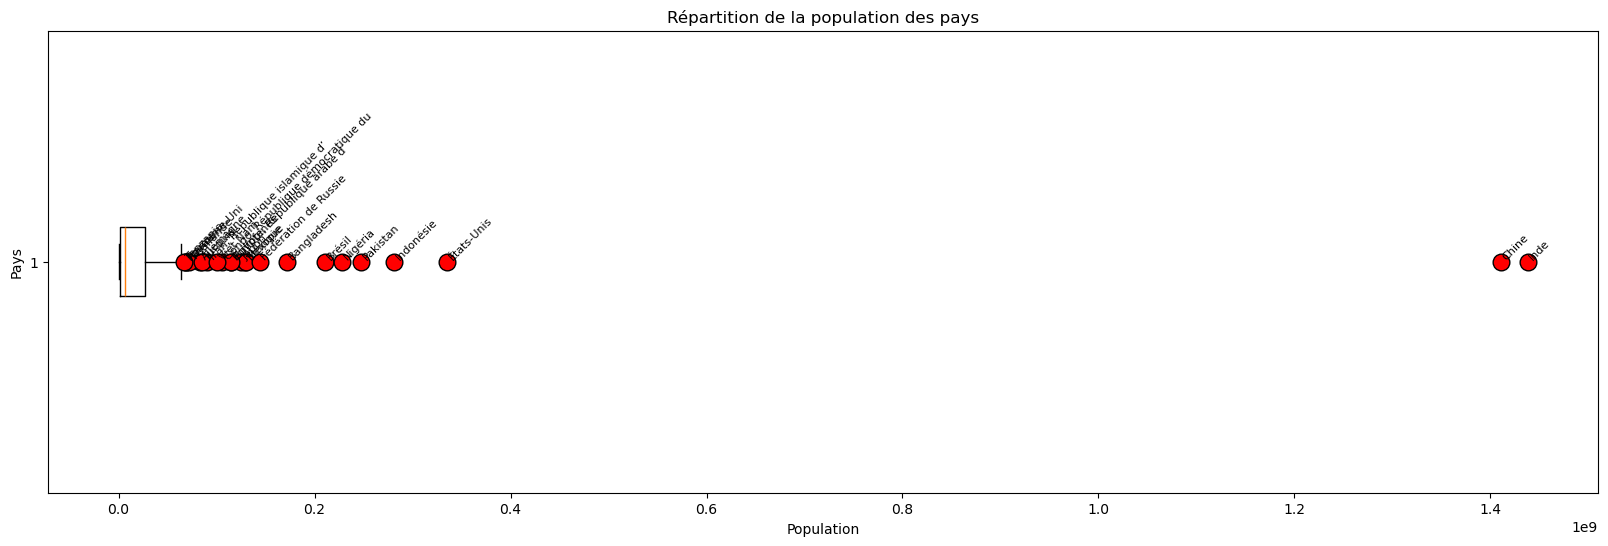

In [71]:
from fonctions_universelles import boxplot_colonne
# Afficher le boxplot pour la population
boxplot_colonne(population, "Population", "Répartition de la population des pays")

### Le fichier **Population** va nous informer sur le **nombre d'habitants** présents dans **213 pays**. Il y a **23 outliers** dont 2 gros : l'Inde et la Chine avec + de 1,4 millards d'habitants

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.2 - Fichier PIB/habitant</h3>
</div>

In [72]:
# Aperçu de la df
pib.head()

,Data Source,Indicateurs du développement dans le monde,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000,2023.00000
3,Aruba,ABW,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26129.839062,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.79062
4,NaN,AFE,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,186.132432,186.947182,197.408105,225.447007,209.005786,226.883067,...,1656.107642,1479.564123,1329.777824,1520.171298,1538.924188,1493.780445,1344.080962,1522.590088,1628.024526,1659.51529


In [73]:
# Définir la troisième ligne comme noms des colonnes
pib.columns = pib.iloc[2]  
# Supprimer les trois premières lignes et réindexer
pib = pib[3:].reset_index(drop=True)
# Ne garder que les colonnes "Pays" et "PIB/Hab" (année 2023)
pib = pib[["Country Name", 2023.0]].rename(columns={"Country Name": "Pays", 2023.0: "PIB/Hab"})
pib.columns = ["Pays", "PIB/Hab"]
# Modifier le type de la colonne population
pib["PIB/Hab"] = pib["PIB/Hab"].fillna(0).astype(int)
# Afficher une brève analyse de la df
from fonctions_universelles import analyser_dataframe
analyser_dataframe(pib, "PIB/Hab")


=== Analyse de PIB/Hab ===
Le tableau comporte 266 observation(s) ou article(s)
Le tableau comporte 2 colonne(s).

Nature des données dans chacune des colonnes :
Pays       object
PIB/Hab     int64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
Pays       264
PIB/Hab    266
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
Pays       264
PIB/Hab    242
dtype: int64

Nombre de doublons présents dans chacune des colonnes :
Pays        0
PIB/Hab    24
dtype: int64

Nombre de valeurs nulles présentes dans chacune des colonnes :
Pays       2
PIB/Hab    0
dtype: int64

Aperçu des 5 premières lignes de la table :
          Pays  PIB/Hab
0        Aruba    33984
1          NaN     1659
2  Afghanistan      415
3          NaN     1568
4       Angola     2308


In [74]:
# Nombre initial de lignes
pib_lignes = len(pib)
# Afficher les pays non renseignés
print(pib[pib.isna().any(axis=1)])
# Supprimer les pays non renseignés
pib = pib.dropna()
# Nombre de lignes après suppression des noms de pays non renseignés
pib_lignes2 = len(pib)
# Vérifier la liste de pays afin d'éliminer les régions et les erreurs
print(pib["Pays"].tolist())

  Pays  PIB/Hab
1  NaN     1659
3  NaN     1568
['Aruba', 'Afghanistan', 'Angola', 'Albanie', 'Andorre', 'Le monde arabe', 'Émirats arabes unis', 'Argentine', 'Arménie', 'Samoa américaines', 'Antigua-et-Barbuda', 'Australie', 'Autriche', 'Azerbaïdjan', 'Burundi', 'Belgique', 'Bénin', 'Burkina Faso', 'Bangladesh', 'Bulgarie', 'Bahreïn', 'Bahamas', 'Bosnie-Herzégovine', 'Bélarus', 'Belize', 'Bermudes', 'Bolivie', 'Brésil', 'Barbade', 'Brunéi Darussalam', 'Bhoutan', 'Botswana', 'République centrafricaine', 'Canada', 'Europe centrale et les pays baltes', 'Suisse', 'Îles Anglo-Normandes', 'Chili', 'Chine', "Côte d'Ivoire", 'Cameroun', 'Congo, République démocratique du', 'Congo, République du', 'Colombie', 'Comores', 'Cabo Verde', 'Costa Rica', 'Petits états des Caraïbes', 'Cuba', 'Curacao', 'Îles Caïmans', 'Chypre', 'République tchèque', 'Allemagne', 'Djibouti', 'Dominique', 'Danemark', 'République dominicaine', 'Algérie', 'Asie de l’Est et Pacifique (hors revenu élevé)', 'de dividende pré

In [75]:
# Supprimer ces pays de la DataFrame
pib = pib[~pib["Pays"].isin(pays_a_supprimer)].reset_index(drop=True)
# Vérifier si les pays sont supprimés
print(pib.count())
# Nombre de lignes après suppression des groupes de pays
pib_lignes3 = len(pib)
# Afficher un aperçu rapide des données
pib.describe()

Pays       213
PIB/Hab    213
dtype: int64


,PIB/Hab
count,213.000000
mean,18451.901408
std,29472.088611
min,0.000000
25%,1706.000000
50%,6609.000000
75%,22573.000000
max,256580.000000


In [76]:
# Afficher les pays avec un PIB/Hab égal à zéro
print(pib.nsmallest(20, 'PIB/Hab')[['Pays', 'PIB/Hab']])
# Supprimer les pays avec un PIB/Hab égal à zéro
pib = pib[pib['PIB/Hab'] != 0]
# Vérifier si les pays sont supprimés
print(pib.count())
# Nombre de lignes après suppression des pays avec un pib/hab nul
pib_lignes4 = len(pib)

                                  Pays  PIB/Hab
8                    Samoa américaines        0
29                             Bhoutan        0
44                                Cuba        0
57                            Érythrée        0
70                           Gibraltar        0
77                           Groenland        0
86                          Île de Man        0
106                              Liban        0
110                      Liechtenstein        0
117                  Saint-Martin (fr)        0
131                          Mariannes        0
138                 Nouvelle-Calédonie        0
156  Corée, République démocratique de        0
160                Polynésie française        0
172                        Saint-Marin        0
175                      Soudan du Sud        0
184          République arabe syrienne        0
192                              Tonga        0
204                          Venezuela        0
13                             Burundi  

In [77]:
print("📊 Nettoyage des données :")
print(f"Départ : {pib_lignes} lignes")
print(f" ├── Suppression des pays sans nom         ➝  {pib_lignes2} lignes  (-{pib_lignes - pib_lignes2})")
print(f" └── Suppression des groupes de pays       ➝  {pib_lignes3} lignes  (-{pib_lignes2 - pib_lignes3})")
print(f" └── Suppression des pays avec pib/hab nul ➝  {pib_lignes4} lignes  (-{pib_lignes3 - pib_lignes4})")
print(f"Arrivée : {pib_lignes4} lignes restantes")

📊 Nettoyage des données :
Départ : 266 lignes
 ├── Suppression des pays sans nom         ➝  264 lignes  (-2)
 └── Suppression des groupes de pays       ➝  213 lignes  (-51)
 └── Suppression des pays avec pib/hab nul ➝  194 lignes  (-19)
Arrivée : 194 lignes restantes


Nombre d'outliers : 16
Pays concernés :
['Australie', 'Bermudes', 'Suisse', 'Îles Caïmans', 'Danemark', 'Îles Féroé', 'Irlande', 'Islande', 'Luxembourg', 'Région administrative spéciale de Macao, Chine', 'Monaco', 'Pays-Bas', 'Norvège', 'Qatar', 'Singapour', 'États-Unis']


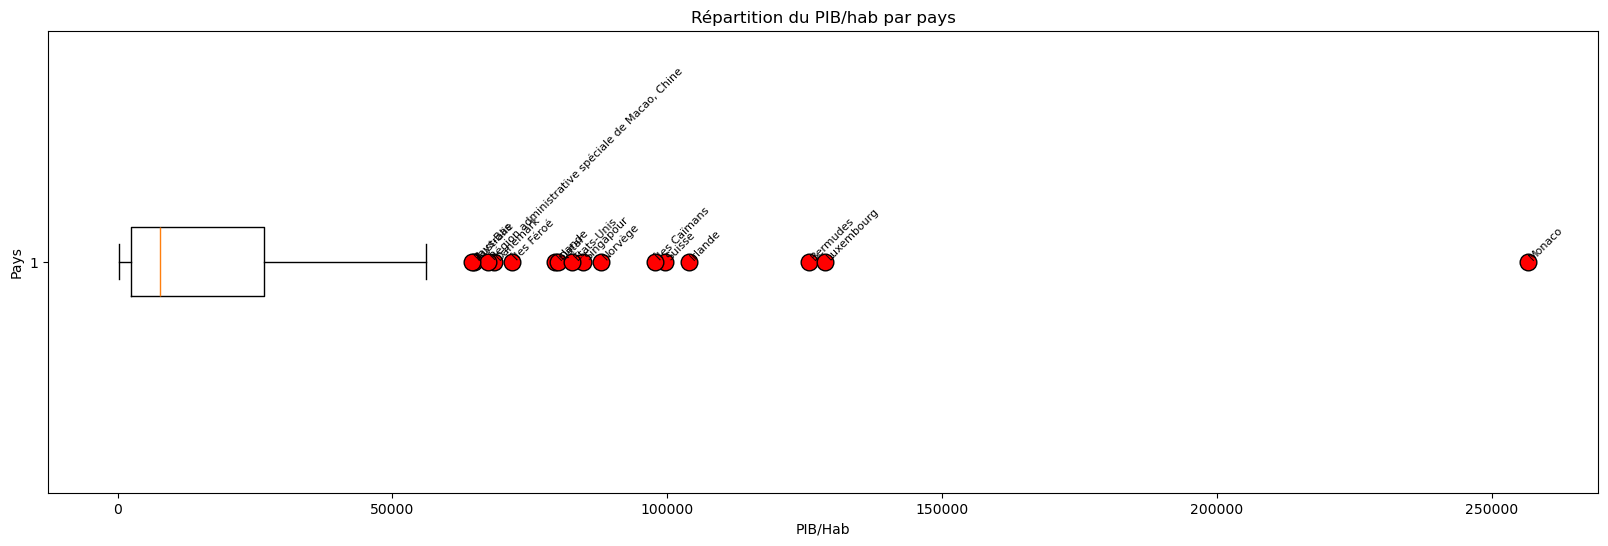

In [78]:
from fonctions_universelles import boxplot_colonne
# Afficher le boxplot pour le PIB/hab
boxplot_colonne(pib, "PIB/Hab", "Répartition du PIB/hab par pays")

### Le fichier **PIB/Hab** va nous informer sur le **PIB par habitants** dans **194 pays**. Il y a **16 outliers** dont une partie sont des paradis fiscaux.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.3 - Fichier Stabilité politique</h3>
</div>

In [79]:
# Aperçu de la df
stab_pol.head()

,Data Source,Indicateurs du développement dans le monde,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.000000,2015.00000,2016.000000,2017.000000,2018.00000,2019.000000,2020.000000,2021.000000,2022.00000,2023.000000
3,Aruba,ABW,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,1.164568,1.21024,1.260759,1.313846,1.33751,1.335807,1.371591,1.431727,1.48308,1.432525
4,NaN,AFE,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Définir la troisième ligne comme noms des colonnes
stab_pol.columns = stab_pol.iloc[2]  
# Supprimer les trois premières lignes et réindexer
stab_pol = stab_pol[3:].reset_index(drop=True)
# Ne garder que les colonnes "Pays" et "Stabilité_politique" (année 2023)
stab_pol = stab_pol[["Country Name", 2023.0]].rename(columns={"Country Name": "Pays", 2023.0: "Stabilité_politique"})
stab_pol.columns = ["Pays", "Stabilité_politique"]
# Afficher une brève analyse de la df
from fonctions_universelles import analyser_dataframe
analyser_dataframe(stab_pol, "Stabilité_politique")


=== Analyse de Stabilité_politique ===
Le tableau comporte 266 observation(s) ou article(s)
Le tableau comporte 2 colonne(s).

Nature des données dans chacune des colonnes :
Pays                    object
Stabilité_politique    float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
Pays                   264
Stabilité_politique    205
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
Pays                   264
Stabilité_politique    199
dtype: int64

Nombre de doublons présents dans chacune des colonnes :
Pays                   0
Stabilité_politique    6
dtype: int64

Nombre de valeurs nulles présentes dans chacune des colonnes :
Pays                    2
Stabilité_politique    61
dtype: int64

Aperçu des 5 premières lignes de la table :
          Pays  Stabilité_politique
0        Aruba             1.432525
1          NaN                  NaN
2  Afghanistan            -2.484081
3          NaN                  NaN
4       Angola            -0.

In [81]:
# Nombre initial de lignes
stab_pol_lignes = len(stab_pol)
# Afficher les pays non renseignés
print(stab_pol[stab_pol.isna().any(axis=1)])
# Supprimer les pays non renseignés
stab_pol = stab_pol.dropna()
# Nombre de lignes après suppression des pays non renseignés
stab_pol_lignes2 = len(stab_pol)
# Vérifier la liste de pays afin d'éliminer les régions et les erreurs
print(stab_pol["Pays"].tolist())

                                         Pays  Stabilité_politique
1                                         NaN                  NaN
3                                         NaN                  NaN
7                              Le monde arabe                  NaN
36         Europe centrale et les pays baltes                  NaN
38                       Îles Anglo-Normandes                  NaN
..                                        ...                  ...
240                 Asie du Sud (BIRD et IDA)                  NaN
241       Afrique subsaharienne (BIRD et IDA)                  NaN
249  Revenu intermédiaire, tranche supérieure                  NaN
255                 Îles Vierges britanniques                  NaN
259                                     Monde                  NaN

[61 rows x 2 columns]
['Aruba', 'Afghanistan', 'Angola', 'Albanie', 'Andorre', 'Émirats arabes unis', 'Argentine', 'Arménie', 'Samoa américaines', 'Antigua-et-Barbuda', 'Australie', 'Autriche', '

In [82]:
# Supprimer ces pays de la DataFrame
stab_pol = stab_pol[~stab_pol["Pays"].isin(pays_a_supprimer)].reset_index(drop=True)
# Vérifier si les pays sont supprimés
print(stab_pol.count())
# Afficher un aperçu rapide des données
stab_pol.describe()
# Nombre de lignes après suppression des pays non renseignés
stab_pol_lignes3 = len(stab_pol)

Pays                   203
Stabilité_politique    203
dtype: int64


In [83]:
print("📊 Nettoyage des données :")
print(f"Départ : {stab_pol_lignes} lignes")
print(f" ├── Suppression des pays non renseignés ➝  {stab_pol_lignes2} lignes  (-{stab_pol_lignes - stab_pol_lignes2})")
print(f" └── Suppression des groupes de pays     ➝  {stab_pol_lignes3} lignes  (-{stab_pol_lignes2 - stab_pol_lignes3})")
print(f"Arrivée : {stab_pol_lignes3} lignes restantes")

📊 Nettoyage des données :
Départ : 266 lignes
 ├── Suppression des pays non renseignés ➝  205 lignes  (-61)
 └── Suppression des groupes de pays     ➝  203 lignes  (-2)
Arrivée : 203 lignes restantes


Nombre d'outliers : 3
Pays concernés :
['Mali', 'République arabe syrienne', 'Yémen, Rép. du']


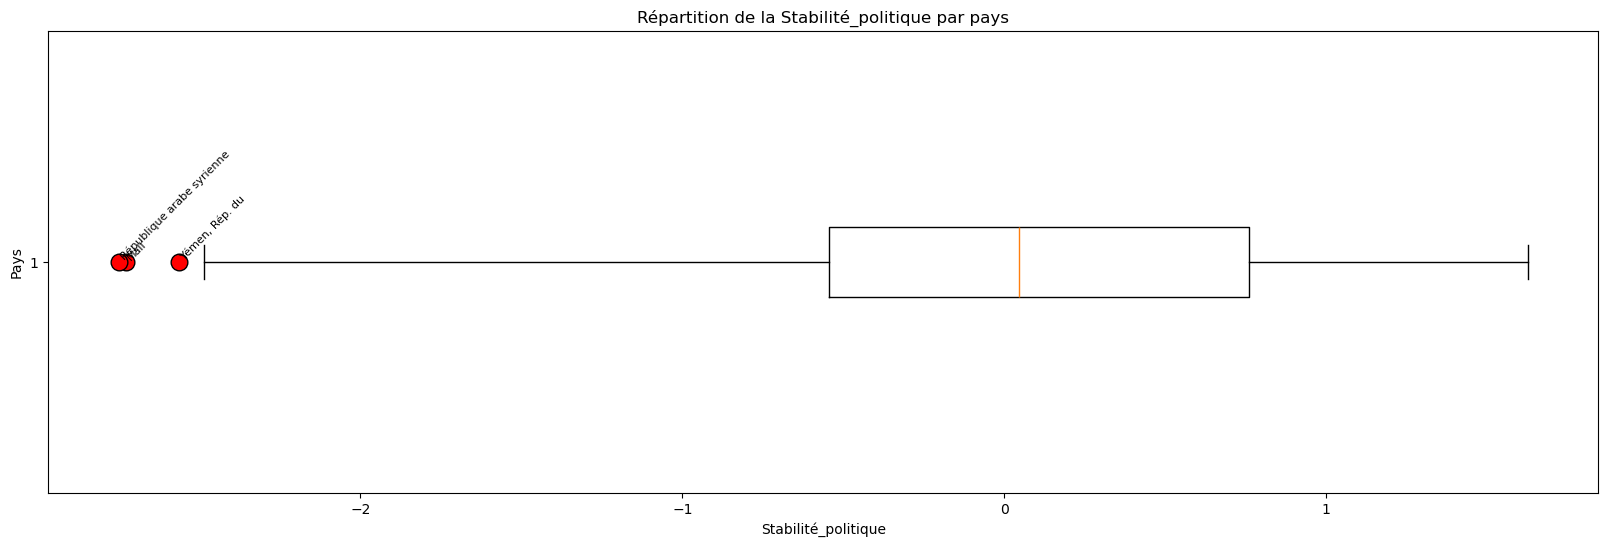

In [84]:
from fonctions_universelles import boxplot_colonne

# Afficher le boxplot pour la Stabilité_politique
boxplot_colonne(stab_pol, "Stabilité_politique", "Répartition de la Stabilité_politique par pays")

### Le fichier **Stabilité politique** va nous informer sur l'**indice de stabilité politique** de **203 pays**. Il y a **3 outliers** : le Mali, le Yémen et la Syrie.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-4" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.4 - Fichier Performance logistique</h3>
</div>

In [85]:
# Aperçu de la df
performance_logistique.head()

,Data Source,Indicateurs du développement dans le monde,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.000000,2015.0,2016.000000,2017.0,2018.000000,2019.0,2020.0,2021.0,2022.000000,2023.0
3,Aruba,ABW,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,AFE,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,2.469728,NaN,2.578623,NaN,2.492222,NaN,NaN,NaN,2.618182,NaN


In [86]:
# Définir la troisième ligne comme noms des colonnes
performance_logistique.columns = performance_logistique.iloc[2]  
# Supprimer les trois premières lignes et réindexer
performance_logistique = performance_logistique[3:].reset_index(drop=True)
# Ne garder que les colonnes "Pays" et "Performance_logistique" (année 2022)
performance_logistique = performance_logistique[["Country Name", 2022.0]].rename(columns={"Country Name": "Pays", 2022.0: "Performance_logistique"})
performance_logistique.columns = ["Pays", "Performance_logistique"]
# Afficher une brève analyse de la df
from fonctions_universelles import analyser_dataframe
analyser_dataframe(performance_logistique, "Performance_logistique")


=== Analyse de Performance_logistique ===
Le tableau comporte 266 observation(s) ou article(s)
Le tableau comporte 2 colonne(s).

Nature des données dans chacune des colonnes :
Pays                       object
Performance_logistique    float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
Pays                      264
Performance_logistique    186
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
Pays                      264
Performance_logistique     65
dtype: int64

Nombre de doublons présents dans chacune des colonnes :
Pays                        0
Performance_logistique    121
dtype: int64

Nombre de valeurs nulles présentes dans chacune des colonnes :
Pays                       2
Performance_logistique    80
dtype: int64

Aperçu des 5 premières lignes de la table :
          Pays  Performance_logistique
0        Aruba                     NaN
1          NaN                2.618182
2  Afghanistan                1.900000
3          NaN  

In [87]:
# Nombre initial de lignes
performance_logistique_lignes = len(performance_logistique)
# Afficher les pays non renseignés
print(performance_logistique[performance_logistique.isna().any(axis=1)])
# Supprimer les pays non renseignés
performance_logistique = performance_logistique.dropna()
# Nombre de lignes après suppression des pays non renseignés
performance_logistique_lignes2 = len(performance_logistique)
# Vérifier la liste de pays afin d'éliminer les régions et les erreurs
print(performance_logistique["Pays"].tolist())

                  Pays  Performance_logistique
0                Aruba                     NaN
1                  NaN                2.618182
3                  NaN                2.473333
6              Andorre                     NaN
11   Samoa américaines                     NaN
..                 ...                     ...
256  Îles Vierges (EU)                     NaN
258            Vanuatu                     NaN
260              Samoa                     NaN
261             Kosovo                     NaN
264             Zambie                     NaN

[82 rows x 2 columns]
['Afghanistan', 'Angola', 'Albanie', 'Le monde arabe', 'Émirats arabes unis', 'Argentine', 'Arménie', 'Antigua-et-Barbuda', 'Australie', 'Autriche', 'Belgique', 'Bénin', 'Burkina Faso', 'Bangladesh', 'Bulgarie', 'Bahreïn', 'Bahamas', 'Bosnie-Herzégovine', 'Bélarus', 'Bolivie', 'Brésil', 'Bhoutan', 'Botswana', 'République centrafricaine', 'Canada', 'Europe centrale et les pays baltes', 'Suisse', 'Chili', 'Chine

In [88]:
# Supprimer ces pays de la DataFrame
performance_logistique = performance_logistique[~performance_logistique["Pays"].isin(pays_a_supprimer)].reset_index(drop=True)
# Vérifier si les pays sont supprimés
print(performance_logistique.count())
# Afficher un aperçu rapide des données
performance_logistique.describe()
# Nombre de lignes après suppression des groupes de pays
performance_logistique_lignes3 = len(performance_logistique)

Pays                      138
Performance_logistique    138
dtype: int64


In [89]:
print("📊 Nettoyage des données :")
print(f"Départ : {performance_logistique_lignes} lignes")
print(f" ├── Suppression des pays non renseignés ➝  {performance_logistique_lignes2} lignes  (-{performance_logistique_lignes - performance_logistique_lignes2})")
print(f" └── Suppression des groupes de pays     ➝  {performance_logistique_lignes3} lignes  (-{performance_logistique_lignes2 - performance_logistique_lignes3})")
print(f"Arrivée : {performance_logistique_lignes3} lignes restantes")

📊 Nettoyage des données :
Départ : 266 lignes
 ├── Suppression des pays non renseignés ➝  184 lignes  (-82)
 └── Suppression des groupes de pays     ➝  138 lignes  (-46)
Arrivée : 138 lignes restantes


Nombre d'outliers : 0


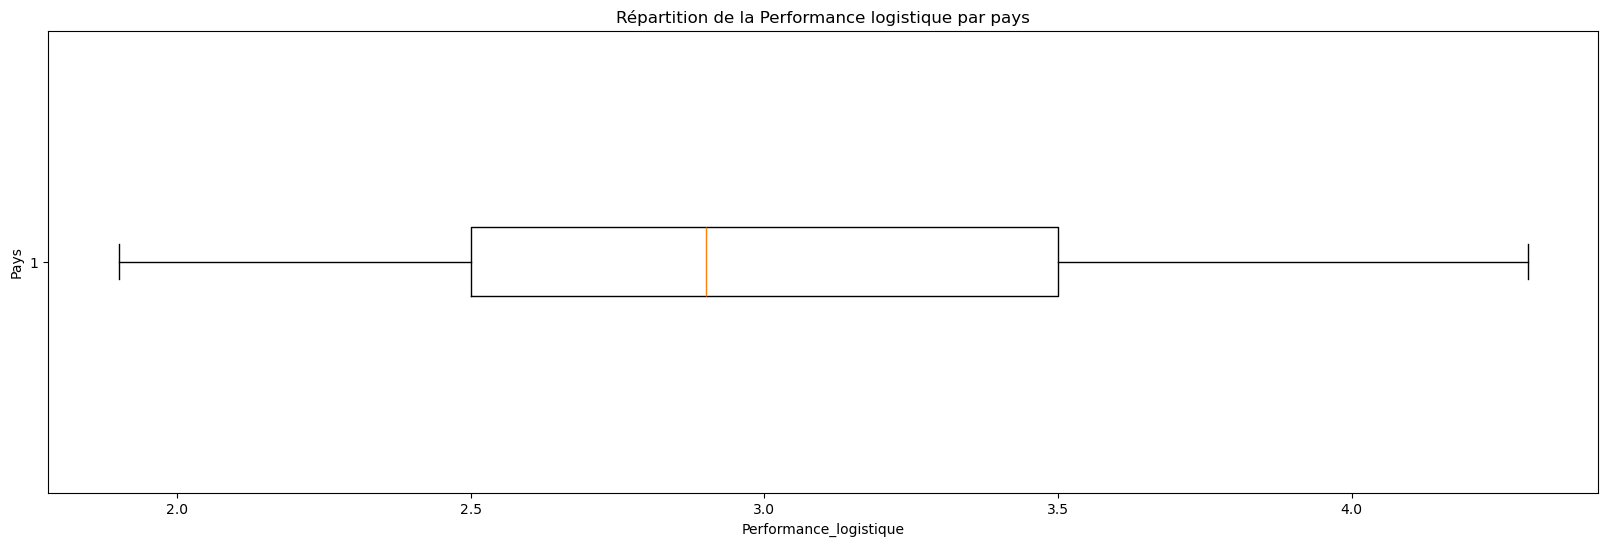

In [90]:
from fonctions_universelles import boxplot_colonne

# Afficher le boxplot pour la Performance_logistique
boxplot_colonne(performance_logistique, "Performance_logistique", "Répartition de la Performance logistique par pays")

### Le fichier **Performance logistique** va nous informer sur l'**indice de performance logistique** de **138 pays**. Il n'y a **aucun outlier**.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-5" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.5 - Fichier Imposition sociétés </h3>
</div>

In [91]:
# Aperçu de la df
fiscalite.head()

,Data Source,Indicateurs du développement dans le monde,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2025-01-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.000,2015.000,2016.000,2017.000,2018.00,2019.000,2020.0,2021.0,2022.0,2023.0
3,Aruba,ABW,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,AFE,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.768,7.912,8.012,8.052,8.08,8.084,NaN,NaN,NaN,NaN


In [92]:
# Définir la troisième ligne comme noms des colonnes
fiscalite.columns = fiscalite.iloc[2]  
# Supprimer les trois premières lignes et réindexer
fiscalite = fiscalite[3:].reset_index(drop=True)
# Ne garder que les colonnes "Pays" et "Fiscalité" (année 2019)
fiscalite = fiscalite[["Country Name", 2019.0]].rename(columns={"Country Name": "Pays", 2019.0: "Fiscalite"})
fiscalite.columns = ["Pays", "Fiscalite"]
# Afficher une brève analyse de la df
from fonctions_universelles import analyser_dataframe
analyser_dataframe(fiscalite, "Fiscalite")


=== Analyse de Fiscalite ===
Le tableau comporte 266 observation(s) ou article(s)
Le tableau comporte 2 colonne(s).

Nature des données dans chacune des colonnes :
Pays          object
Fiscalite    float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
Pays         264
Fiscalite    237
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
Pays         264
Fiscalite    170
dtype: int64

Nombre de doublons présents dans chacune des colonnes :
Pays          0
Fiscalite    67
dtype: int64

Nombre de valeurs nulles présentes dans chacune des colonnes :
Pays          2
Fiscalite    29
dtype: int64

Aperçu des 5 premières lignes de la table :
          Pays  Fiscalite
0        Aruba        NaN
1          NaN   8.084000
2  Afghanistan   0.000000
3          NaN  21.477273
4       Angola   9.000000


In [93]:
# Nombre initial de lignes
fiscalite_lignes = len(fiscalite)
# Afficher les pays non renseignés
print(fiscalite[fiscalite.isna().any(axis=1)])
# Supprimer les pays non renseignés
fiscalite = fiscalite.dropna()
# Vérifier la liste de pays afin d'éliminer les régions et les erreurs
print(fiscalite["Pays"].tolist())
# Nombre de lignes après suppression des pays non renseignés
fiscalite_lignes2 = len(fiscalite)

                                               Pays  Fiscalite
0                                             Aruba        NaN
1                                               NaN   8.084000
3                                               NaN  21.477273
6                                           Andorre        NaN
11                                Samoa américaines        NaN
27                                         Bermudes        NaN
38                             Îles Anglo-Normandes        NaN
50                                             Cuba        NaN
51                                          Curacao        NaN
52                                     Îles Caïmans        NaN
78                                       Îles Féroé        NaN
84                                        Gibraltar        NaN
91                                        Groenland        NaN
93                                             Guam        NaN
108                                      Île de Man    

In [94]:
# Supprimer ces pays de la DataFrame
fiscalite = fiscalite[~fiscalite["Pays"].isin(pays_a_supprimer)].reset_index(drop=True)
# Vérifier si les pays sont supprimés
print(fiscalite.count())
# Nombre de lignes après suppression des groupes de pays
fiscalite_lignes3 = len(fiscalite)
# Afficher un aperçu rapide des données
fiscalite.describe()

Pays         189
Fiscalite    189
dtype: int64


,Fiscalite
count,189.000000
mean,16.265079
std,10.746684
min,0.000000
25%,8.500000
50%,13.700000
75%,23.100000
max,50.000000


In [95]:
# Afficher les pays ayant une fiscalité égale à zéro
print(fiscalite[fiscalite["Fiscalite"] == 0])
# Supprimer ces pays
fiscalite = fiscalite.loc[fiscalite["Fiscalite"] != 0]
# Nombre de lignes après suppression des pays avec une fiscalité égale à zéro
fiscalite_lignes4 = len(fiscalite)

                    Pays  Fiscalite
0            Afghanistan        0.0
5                Arménie        0.0
14            Bangladesh        0.0
25               Bhoutan        0.0
26              Botswana        0.0
37               Comores        0.0
50              Érythrée        0.0
60               Géorgie        0.0
101              Lesotho        0.0
111    Macédoine du Nord        0.0
141  Cisjordanie et Gaza        0.0
157             Suriname        0.0


In [96]:
print("📊 Nettoyage des données :")
print(f"Départ : {fiscalite_lignes} lignes")
print(f" ├── Suppression des pays non renseignés       ➝  {fiscalite_lignes2} lignes  (-{fiscalite_lignes - fiscalite_lignes2})")
print(f" └── Suppression des groupes de pays           ➝  {fiscalite_lignes3} lignes  (-{fiscalite_lignes2 - fiscalite_lignes3})")
print(f" └── Suppression des pays avec fiscalité nulle ➝  {fiscalite_lignes4} lignes  (-{fiscalite_lignes3 - fiscalite_lignes4})")
print(f"Arrivée : {fiscalite_lignes4} lignes restantes")

📊 Nettoyage des données :
Départ : 266 lignes
 ├── Suppression des pays non renseignés       ➝  235 lignes  (-31)
 └── Suppression des groupes de pays           ➝  189 lignes  (-46)
 └── Suppression des pays avec fiscalité nulle ➝  177 lignes  (-12)
Arrivée : 177 lignes restantes


Nombre d'outliers : 3
Pays concernés :
['Belgique', 'Chine', 'France']


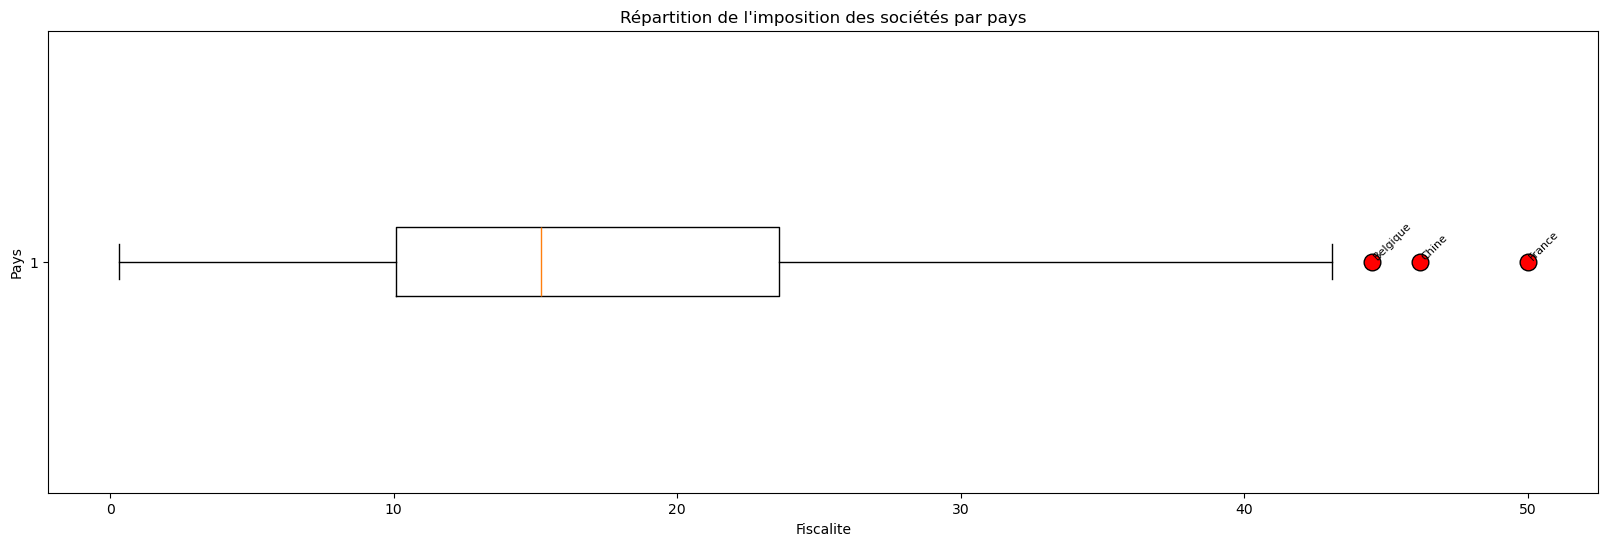

In [97]:
from fonctions_universelles import boxplot_colonne

# Afficher le boxplot pour la Fiscalité
boxplot_colonne(fiscalite, "Fiscalite", "Répartition de l'imposition des sociétés par pays")

### Le fichier **Imposition sociétés** va nous informer sur le **taux d'imposition sur les bénéfices commerciaux** de **177 pays**. Il y a **3 outliers** : la France, la Chine et la Belgique.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-6" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.6 - Fichier Disponibilité Alimentaire </h3>
</div>

In [98]:
# Aperçu de la df (2022)
dispo_alimentaire.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2022,2022,1000 t,29.00,I,Valeur imputée,NaN
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5611,Importations - quantité,S2734,Viande de Volailles,2022,2022,1000 t,7.00,I,Valeur imputée,NaN
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5301,Disponibilité intérieure,S2734,Viande de Volailles,2022,2022,1000 t,36.00,I,Valeur imputée,NaN
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2022,2022,kcal/personne,0.87,E,Valeur estimée,NaN
4,FBS,Bilans Alimentaires (2010-),710,Afrique du Sud,5511,Production,S2734,Viande de Volailles,2022,2022,1000 t,1958.00,I,Valeur imputée,NaN


In [99]:
# Sélectionner les colonnes utiles
dispo_alimentaire = dispo_alimentaire[["Zone", "Élément", "Valeur"]]
# Pivot pour avoir les éléments en colonnes
dispo_pivot = dispo_alimentaire.pivot(index="Zone", columns="Élément", values="Valeur")
# Supprimer les nouvelles colonnes inutiles
dispo_pivot = dispo_pivot.drop(columns=["Disponibilité alimentaire en quantité (kg/personne/an)", "Exportations - quantité"], errors='ignore')
# Afficher un aperçu du DataFrame mis à jour
dispo_pivot.head()

Élément,Disponibilité intérieure,Importations - quantité,Production
Zone,,,
Afghanistan,36.0,7.0,29.0
Afrique du Sud,2370.0,304.0,1958.0
Albanie,64.0,47.0,18.0
Algérie,275.0,0.0,275.0
Allemagne,1462.0,789.0,1507.0


In [100]:
# Réinitialiser l'index pour transformer "Zone" en colonne normale
dispo_pivot = dispo_pivot.reset_index()
# Renommer la colonne "Zone" en "Pays"
dispo_pivot = dispo_pivot.rename(columns={"Zone": "Pays"})
# Afficher un aperçu du df mis à jour
dispo_pivot.head()

Élément,Pays,Disponibilité intérieure,Importations - quantité,Production
0,Afghanistan,36.0,7.0,29.0
1,Afrique du Sud,2370.0,304.0,1958.0
2,Albanie,64.0,47.0,18.0
3,Algérie,275.0,0.0,275.0
4,Allemagne,1462.0,789.0,1507.0


In [101]:
# Afficher une brève analyse de la df
from fonctions_universelles import analyser_dataframe
analyser_dataframe(dispo_pivot)


=== Analyse de Tables ===
Le tableau comporte 189 observation(s) ou article(s)
Le tableau comporte 4 colonne(s).

Nature des données dans chacune des colonnes :
Élément
Pays                         object
Disponibilité intérieure    float64
Importations - quantité     float64
Production                  float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
Élément
Pays                        189
Disponibilité intérieure    189
Importations - quantité     189
Production                  186
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
Élément
Pays                        189
Disponibilité intérieure    148
Importations - quantité      98
Production                  133
dtype: int64

Nombre de doublons présents dans chacune des colonnes :
Élément
Pays                         0
Disponibilité intérieure    41
Importations - quantité     91
Production                  53
dtype: int64

Nombre de valeurs nulles présentes dans chacune des colonne

In [102]:
# Nombre initial de lignes
dispo_pivot_lignes = len(dispo_pivot)
# Afficher les lignes où la colonne "Production" a des valeurs nulles (NaN)
pays_null_production = dispo_pivot[dispo_pivot['Production'].isnull()]
# Afficher les résultats
print(pays_null_production)
# Remplacer les valeurs nulles dans la colonne "Production" par 0
dispo_pivot['Production'] = dispo_pivot['Production'].fillna(0)
# Conversion des colonnes en int64
dispo_pivot[["Disponibilité intérieure", "Importations - quantité", "Production"]] = dispo_pivot[["Disponibilité intérieure", "Importations - quantité", "Production"]].astype("int64")

Élément           Pays  Disponibilité intérieure  Importations - quantité  \
48            Djibouti                       4.0                      4.0   
98            Maldives                      18.0                     18.0   
187      Îles Marshall                       3.0                      3.0   

Élément  Production  
48              NaN  
98              NaN  
187             NaN  


In [103]:
# Afficher un aperçu rapide des données
dispo_pivot.describe()

Élément,Disponibilité intérieure,Importations - quantité,Production
count,189.000000,189.000000,189.000000
mean,858.936508,103.941799,863.804233
std,3002.752733,242.656073,3149.298804
min,0.000000,0.000000,0.000000
25%,31.000000,4.000000,9.000000
50%,116.000000,20.000000,74.000000
75%,374.000000,87.000000,365.000000
max,25364.000000,1871.000000,24194.000000


In [104]:
print("📊 Nettoyage des données :")
print(f"Départ : {dispo_pivot_lignes} lignes")
print(f"Arrivée : {dispo_pivot_lignes} lignes restantes")

📊 Nettoyage des données :
Départ : 189 lignes
Arrivée : 189 lignes restantes


Nombre d'outliers : 32
Pays concernés :
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Argentine', 'Australie', 'Brésil', 'Canada', 'Chine', 'Chine, Taiwan Province de', 'Chine, continentale', 'Colombie', 'Espagne', 'France', 'Fédération de Russie', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Italie', 'Japon', 'Malaisie', 'Mexique', 'Pakistan', 'Philippines', 'Pologne', 'Pérou', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'République de Corée', 'Turquie', 'Ukraine', 'Viet Nam', 'Égypte', "États-Unis d'Amérique"]


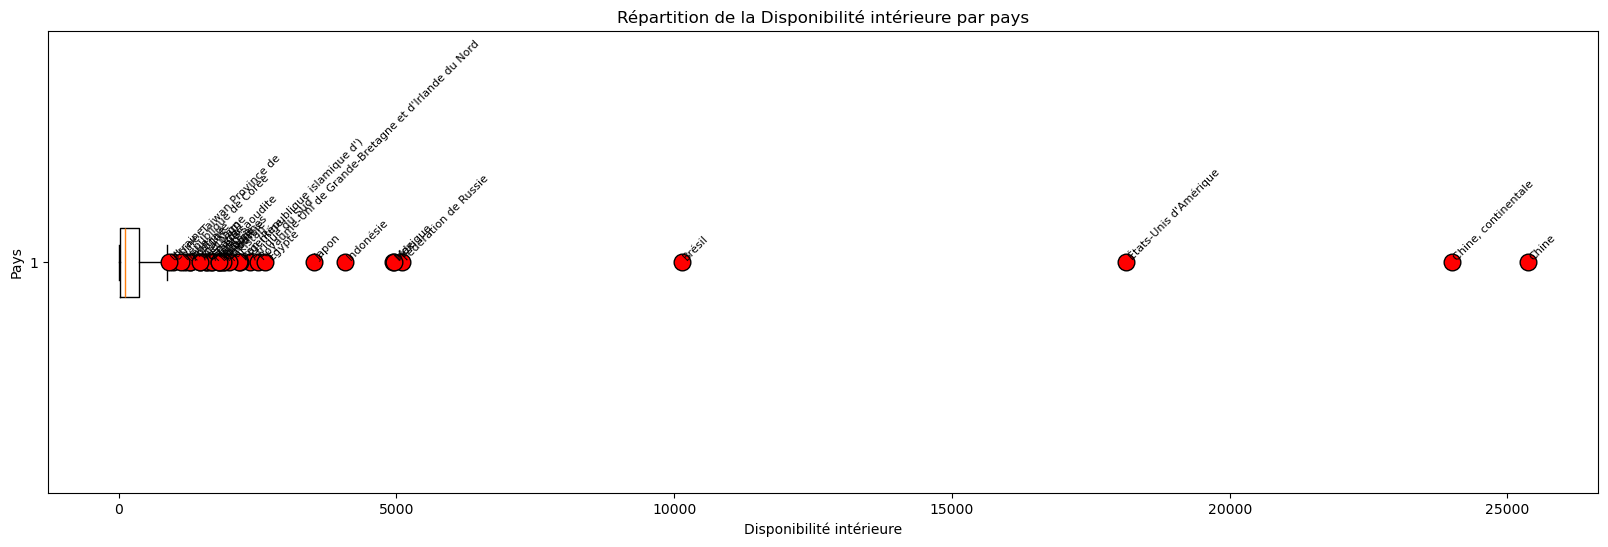

Nombre d'outliers : 22
Pays concernés :
['Afrique du Sud', 'Allemagne', 'Angola', 'Arabie saoudite', 'Belgique', 'Chine', 'Chine - RAS de Hong-Kong', 'Chine, Taiwan Province de', 'Chine, continentale', 'Cuba', 'Espagne', 'France', 'Ghana', 'Iraq', 'Japon', 'Mexique', 'Pays-Bas (Royaume des)', 'Philippines', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'République de Corée', 'Viet Nam', 'Émirats arabes unis']


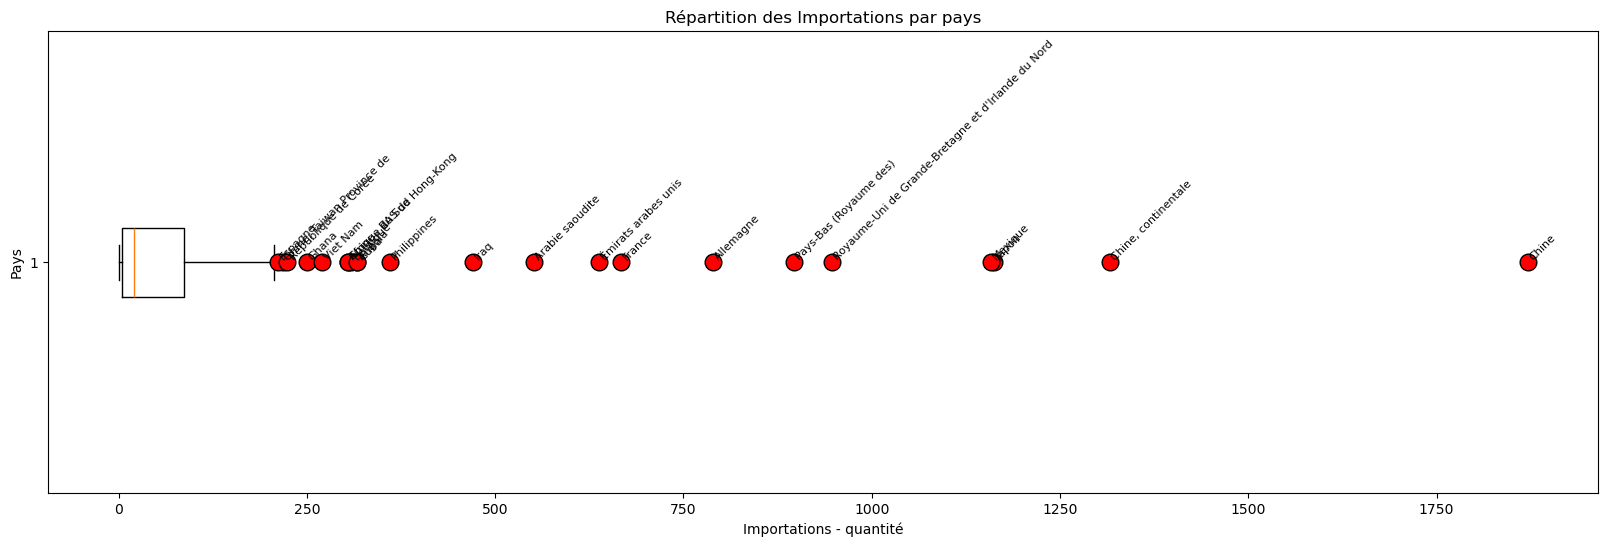

Nombre d'outliers : 32
Pays concernés :
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Argentine', 'Australie', 'Brésil', 'Canada', 'Chine', 'Chine, continentale', 'Colombie', 'Espagne', 'France', 'Fédération de Russie', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Italie', 'Japon', 'Malaisie', 'Mexique', 'Pakistan', 'Philippines', 'Pologne', 'Pérou', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'République de Corée', 'Thaïlande', 'Turquie', 'Ukraine', 'Viet Nam', 'Égypte', "États-Unis d'Amérique"]


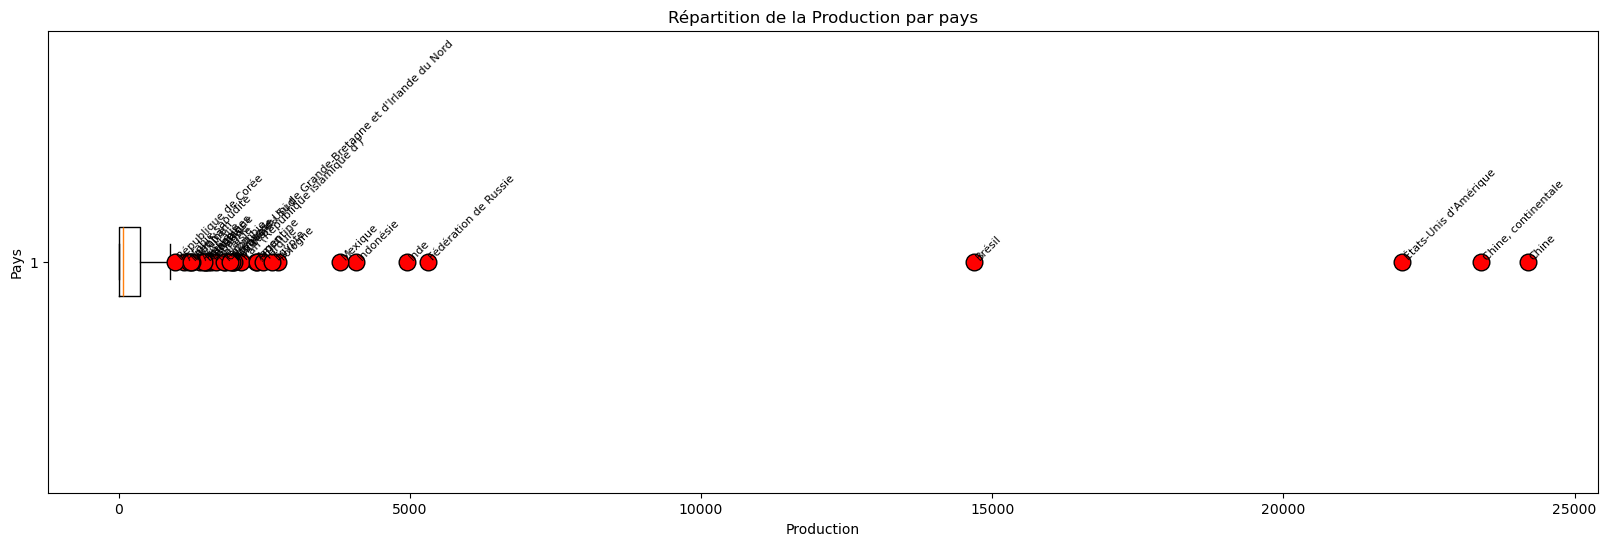

In [105]:
from fonctions_universelles import boxplot_colonne
# Afficher le boxplot pour la Disponibilité intérieure
boxplot_colonne(dispo_pivot, "Disponibilité intérieure", "Répartition de la Disponibilité intérieure par pays")
# Afficher le boxplot pour les Importations
boxplot_colonne(dispo_pivot, "Importations - quantité", "Répartition des Importations par pays")
# Afficher le boxplot pour la Production
boxplot_colonne(dispo_pivot, "Production", "Répartition de la Production par pays")

### Le fichier **Disponibilité intérieure** va nous informer sur la **Disponibilité intérieure**, les **Importations** et la **Production** en viande de volailles de **189 pays**. 
### Les **outliers ne sont pas interessants** car les grands écarts de population ne sont pas pris en compte. 
### Nous **calculerons donc ces valeurs en fonction du nombre d'habitant de chaque pays** une fois que les fichiers seront joints.

<div style="background-color: RGB(255,164,100);" >
  <h2 id="etape-3" style="margin: auto; padding: 20px;">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="3-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.1 - Jonction des fichiers issus de la banque mondiale</h3>
</div>

In [106]:
# Jonction interne des fichiers 
from functools import reduce
jonction_BM = [population, pib, stab_pol, performance_logistique, fiscalite]
jonction_BM_final = reduce(lambda left, right: pd.merge(left, right, on=["Pays"], how="inner"), jonction_BM)

In [107]:
# Afficher une brève analyse de la df
from fonctions_universelles import analyser_dataframe
analyser_dataframe(jonction_BM_final)


=== Analyse de Tables ===
Le tableau comporte 127 observation(s) ou article(s)
Le tableau comporte 6 colonne(s).

Nature des données dans chacune des colonnes :
Pays                       object
Population                  int64
PIB/Hab                     int64
Stabilité_politique       float64
Performance_logistique    float64
Fiscalite                 float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
Pays                      127
Population                127
PIB/Hab                   127
Stabilité_politique       127
Performance_logistique    127
Fiscalite                 127
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
Pays                      127
Population                127
PIB/Hab                   127
Stabilité_politique       127
Performance_logistique     24
Fiscalite                 102
dtype: int64

Nombre de doublons présents dans chacune des colonnes :
Pays                        0
Population                  0
PIB/H

### Nous avons effectué une **jointure interne** qui nous permet de garder des **données fiables et complètes**. Notre df renseigne toutes les informations pour **127 pays**.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="3-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.2 - Harmonisation des noms des pays</h3>
</div>

### Nous allons d'abord effectuer une **jointure externe** afin de repérer les pays n'ayant pas la même dénomination dans les 2 bases de données (FAO et banque mondiale).

In [108]:
# Fusionner les fichiers
merge_test_outer = pd.merge(dispo_pivot, jonction_BM_final, on='Pays', how='outer', indicator=True)
# Afficher le résultat
merge_test_outer.head()

,Pays,Disponibilité intérieure,Importations - quantité,Production,Population,PIB/Hab,Stabilité_politique,Performance_logistique,Fiscalite,_merge
0,Afghanistan,36.0,7.0,29.0,NaN,NaN,NaN,NaN,NaN,left_only
1,Afrique du Sud,2370.0,304.0,1958.0,63212384.0,6022.0,-0.665642,3.7,4.0,both
2,Albanie,64.0,47.0,18.0,2745972.0,8575.0,0.183349,2.5,18.8,both
3,Algérie,275.0,0.0,275.0,46164219.0,5364.0,-0.577885,2.5,31.1,both
4,Allemagne,1462.0,789.0,1507.0,83280000.0,54343.0,0.586989,4.1,21.5,both


In [109]:
# Analyser des 'left_only' (présents uniquement dans dispo_pivot) et 'right_only' (présents uniquement dans jonction_BM_final)
left_only = merge_test_outer[merge_test_outer['_merge'] == 'left_only']
right_only = merge_test_outer[merge_test_outer['_merge'] == 'right_only']
# Compter le nombre de lignes "left_only" et "right_only"
merge_test_outer_left_only_nombre = len(left_only)
merge_test_outer_right_only_nombre = len(right_only)
# Calculer le pourcentage de lignes "left_only" et "right_only"
total_rows = len(merge_test_outer)
left_only_pourcentage = (merge_test_outer_left_only_nombre / total_rows) * 100
right_only_pourcentage = (merge_test_outer_right_only_nombre / total_rows) * 100
# Afficher les résultats
print(f"Nombre de lignes uniquement dans dispo_pivot ('left_only') : {merge_test_outer_left_only_nombre} ({left_only_pourcentage:.2f}%)")
print(f"Nombre de lignes uniquement dans jonction_BM_final ('right_only') : {merge_test_outer_right_only_nombre} ({right_only_pourcentage:.2f}%)")

Nombre de lignes uniquement dans dispo_pivot ('left_only') : 78 (38.05%)
Nombre de lignes uniquement dans jonction_BM_final ('right_only') : 16 (7.80%)


In [110]:
# Afficher les 78 pays présents uniquement dans les donneés de la FAO
print(left_only["Pays"].tolist())

['Afghanistan', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Barbade', 'Belize', 'Bhoutan', 'Bolivie (État plurinational de)', 'Botswana', 'Burundi', 'Cabo Verde', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chine, continentale', 'Comores', 'Congo', 'Cuba', "Côte d'Ivoire", 'Dominique', 'Eswatini', 'Géorgie', "Iran (République islamique d')", 'Jordanie', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho', 'Liban', 'Macédoine du Nord', 'Malawi', 'Maldives', 'Maroc', 'Micronésie (États fédérés de)', 'Mozambique', 'Myanmar', 'Nauru', 'Niger', 'Nouvelle-Calédonie', 'Népal', 'Ouganda', 'Pakistan', 'Pays-Bas (Royaume des)', 'Polynésie française', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'République arabe syrienne', 'République de Corée', 'République de Moldova', 'République démocratique du Congo', 'République-Unie de Tanzanie', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Sao Tomé-et-Principe', 'Seychelles', 

In [111]:
# Afficher les 16 pays présents uniquement dans les donneés de la banque mondiale
print(right_only["Pays"].tolist())

['Bolivie', 'Chine, RAS de Hong Kong', 'Congo, République du', 'Congo, République démocratique du', 'Corée, République de', 'Iran, République islamique d’', 'Moldova', 'Pays-Bas', 'Royaume-Uni', 'République kirghize', 'République slovaque', 'République tchèque', 'Singapour', 'Yémen, Rép. du', 'Égypte, République arabe d’', 'États-Unis']


In [112]:
# Mise en place d'un dictionnaire de correspondance
correspondance_pays = {
    "Bolivie (État plurinational de)": "Bolivie",
    "Chine - RAS de Hong-Kong": "Chine, RAS de Hong Kong",
    "Congo": "Congo, République du",
    "République démocratique du Congo": "Congo, République démocratique du",
    "République de Corée": "Corée, République de",
    "Iran (République islamique d')": "Iran, République islamique d’",
    "République de Moldova": "Moldova",
    "Pays-Bas (Royaume des)": "Pays-Bas",
    "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": "Royaume-Uni",
    "Kirghizistan": "République kirghize",
    "Slovaquie": "République slovaque",
    "Tchéquie": "République tchèque",
    "Yémen": "Yémen, Rép. du",
    "Égypte": "Égypte, République arabe d’",
    "États-Unis d'Amérique": "États-Unis"
}
# Appliquer la correspondance
dispo_pivot["Pays"] = dispo_pivot["Pays"].replace(correspondance_pays)
jonction_BM_final["Pays"] = jonction_BM_final["Pays"].replace(correspondance_pays)
# Afficher les pays sans correspondance
pays_fao = set(dispo_pivot["Pays"])
pays_bm = set(jonction_BM_final["Pays"])
pays_uniques_fao = pays_fao - pays_bm
pays_uniques_bm = pays_bm - pays_fao
print("Pays présents uniquement dans la FAO après correction :", pays_uniques_fao)
print("Pays présents uniquement dans la Banque Mondiale après correction :", pays_uniques_bm)

Pays présents uniquement dans la FAO après correction : {'Tunisie', 'Venezuela (République bolivarienne du)', 'Micronésie (États fédérés de)', 'Ouganda', 'Macédoine du Nord', 'Chine, continentale', 'Tuvalu', 'Arménie', 'Malawi', 'Liban', 'Sao Tomé-et-Principe', 'Suriname', 'Dominique', 'Mozambique', 'Barbade', 'Somalie', 'Équateur', 'Sainte-Lucie', 'République arabe syrienne', "Côte d'Ivoire", 'Myanmar', 'Bangladesh', 'Afghanistan', 'Lesotho', 'Tchad', 'Kenya', 'Tonga', 'République-Unie de Tanzanie', 'Zambie', 'Nauru', 'Vanuatu', 'Sierra Leone', 'Polynésie française', 'Kiribati', 'Nouvelle-Calédonie', 'Népal', 'Géorgie', 'Saint-Vincent-et-les Grenadines', 'Seychelles', 'Azerbaïdjan', 'Eswatini', 'Maldives', 'Îles Marshall', 'Jordanie', 'Chine, Taiwan Province de', 'Turkménistan', 'Samoa', 'Maroc', 'Saint-Kitts-et-Nevis', 'Sénégal', 'Burundi', 'Éthiopie', 'Comores', 'Chine - RAS de Macao', 'Pakistan', 'Bhoutan', 'Cabo Verde', 'Cuba', 'Botswana', 'Soudan du Sud', 'Timor-Leste', 'Belize',

### Nous avons **mis en correpondance 15 pays** dont les dénominations étaient différentes.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="3-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.3 - Jointure finale avec les données FAO</h3>
</div>

In [113]:
# Jonction interne des fichiers 
donnees = dispo_pivot.merge(jonction_BM_final, on="Pays", how="inner")

In [114]:
# Afficher une brève analyse de la df
from fonctions_universelles import analyser_dataframe
analyser_dataframe(donnees)


=== Analyse de Tables ===
Le tableau comporte 126 observation(s) ou article(s)
Le tableau comporte 9 colonne(s).

Nature des données dans chacune des colonnes :
Pays                         object
Disponibilité intérieure      int64
Importations - quantité       int64
Production                    int64
Population                    int64
PIB/Hab                       int64
Stabilité_politique         float64
Performance_logistique      float64
Fiscalite                   float64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
Pays                        126
Disponibilité intérieure    126
Importations - quantité     126
Production                  126
Population                  126
PIB/Hab                     126
Stabilité_politique         126
Performance_logistique      126
Fiscalite                   126
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
Pays                        126
Disponibilité intérieure    111
Importations - quantité

In [115]:
# Nombre de pays restants
pays_restants = 126
# Nombre de pays initiaux dans chaque source
nb_pays_fao = 189
nb_pays_banque_mondiale = 213
# Calcul des pourcentages
pct_fao = (pays_restants / nb_pays_fao) * 100
pct_bm = (pays_restants / nb_pays_banque_mondiale) * 100
# Affichage des résultats
print(f"📊 Pourcentage de pays gardés après jointure pour chaque source de données :")
print(f"  FAO : {pct_fao:.2f}% ({pays_restants}/{nb_pays_fao})")
print(f"  Banque Mondiale : {pct_bm:.2f}% ({pays_restants}/{nb_pays_banque_mondiale})")

📊 Pourcentage de pays gardés après jointure pour chaque source de données :
  FAO : 66.67% (126/189)
  Banque Mondiale : 59.15% (126/213)


### Nous avons effectué une **jointure interne** qui nous permet de garder des **données fiables et complètes**. Notre df finale renseigne toutes les informations pour **126 pays**.

<div style="background-color: RGB(255,164,100);" >
  <h2 id="etape-4" style="margin: auto; padding: 20px;">Etape 4 - Finalisation de la base de données</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="4-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">4.1 - Création des dernières colonnes calculées</h3>
</div>

### Les colonnes issues des données de la FAO **"Disponibilité intérieure", "Importations - quantité" et  "Production"** concernant la viande de volaille sont exprimées en **milliers de tonnes**. Nous allons faire un calcul afin qu'elles soient exprimées en **kg/hab/an**.

In [116]:
# Appliquer le calcul pour chaque colonne
colonnes = ["Disponibilité intérieure", "Importations - quantité", "Production"]
for col in colonnes:
    donnees[col] = (donnees[col] * 1000 * 1000) / donnees["Population"]
# Vérification des premières lignes après le calcul
print(donnees[["Disponibilité intérieure", "Importations - quantité", "Production"]].head())

   Disponibilité intérieure  Importations - quantité  Production
0                 37.492653                 4.809184   30.974943
1                 23.306865                17.115979    6.555056
2                  5.956995                 0.000000    5.956995
3                 17.555235                 9.474063   18.095581
4                 10.176897                 8.598661    1.605446


<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="4-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">4.2 - Analyse exploratoire des colonnes calculées</h3>
</div>

Nombre d'outliers : 0


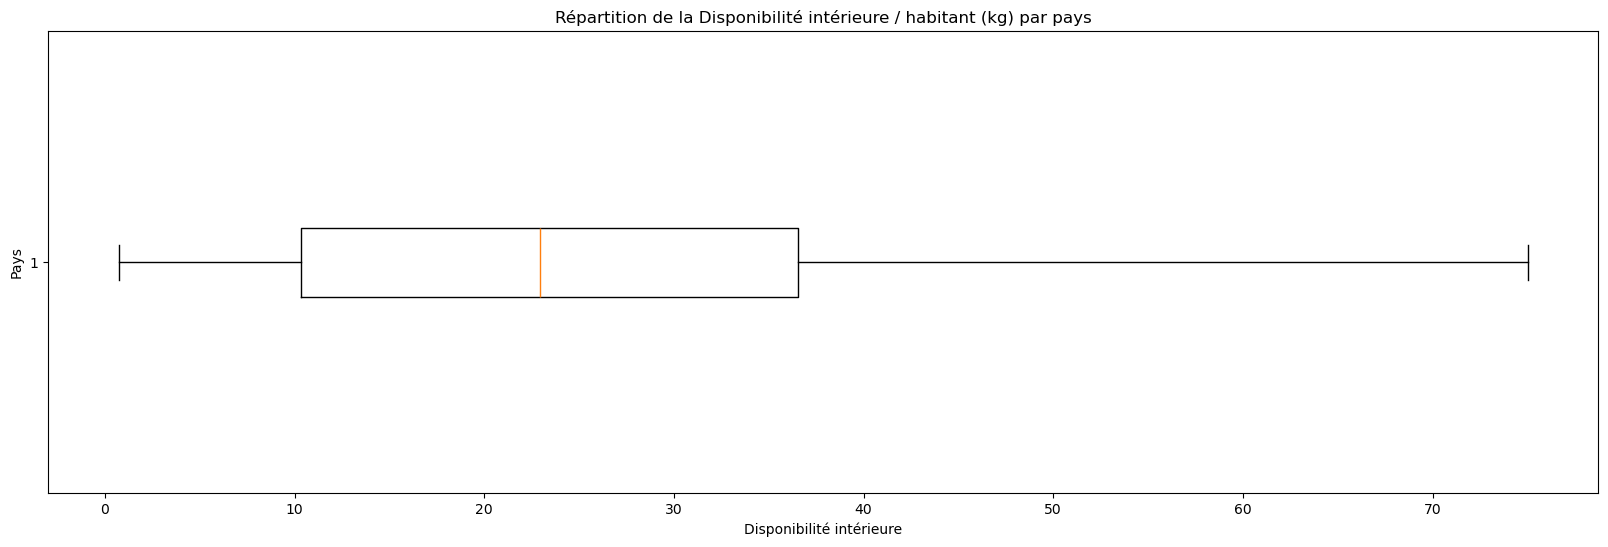

Nombre d'outliers : 10
Pays concernés :
['Antigua-et-Barbuda', 'Bahamas', 'Bahreïn', 'Chine, RAS de Hong Kong', 'Gabon', 'Grenade', 'Koweït', 'Pays-Bas', 'Qatar', 'Émirats arabes unis']


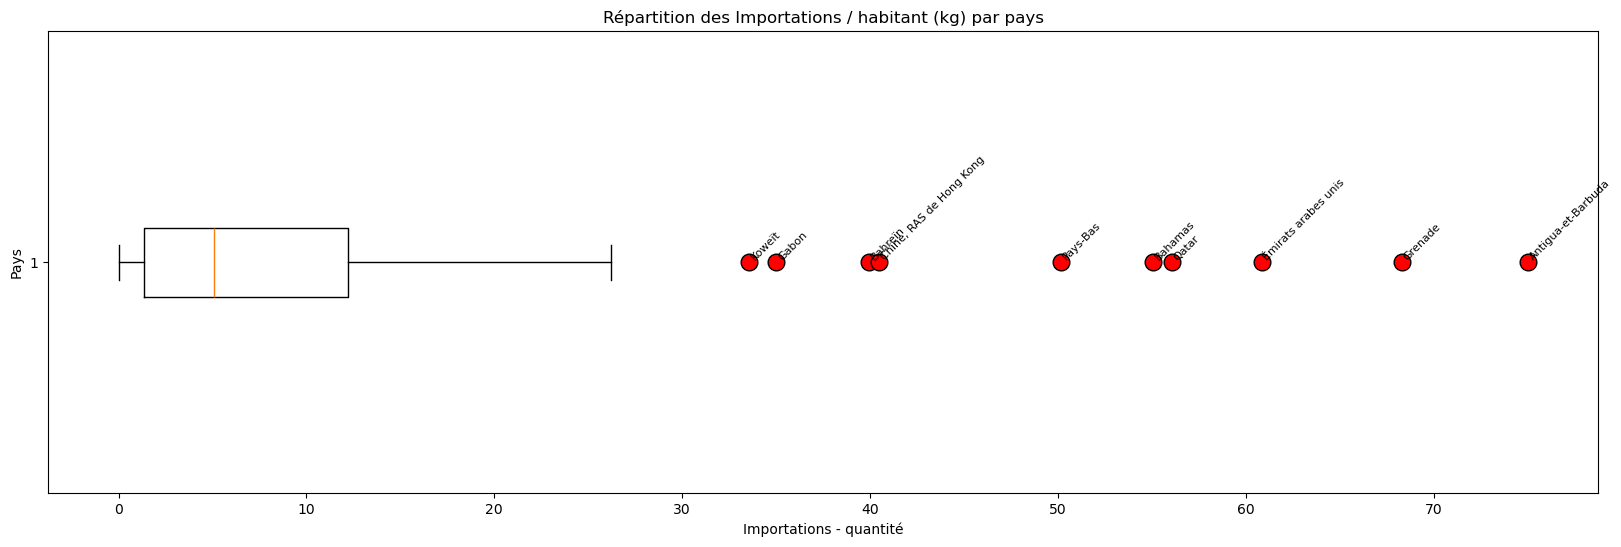

Nombre d'outliers : 1
Pays concernés :
['Pologne']


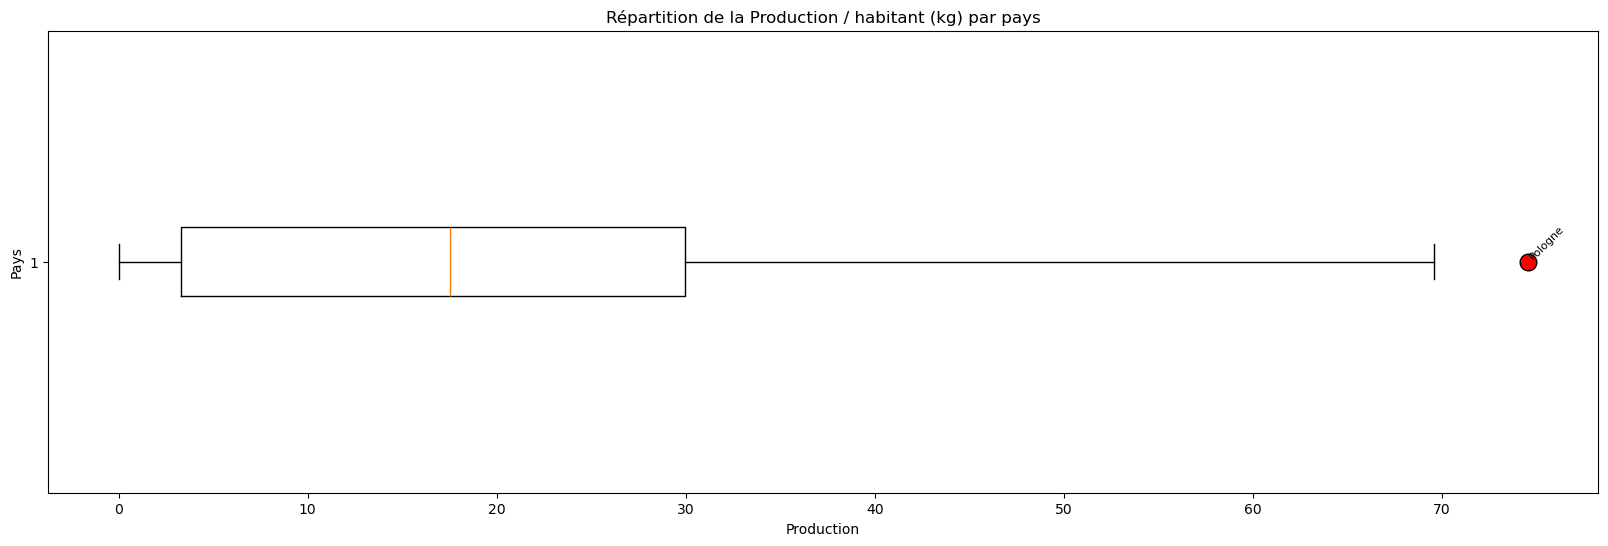

In [117]:
# Afficher le boxplot pour la Disponibilité intérieure
boxplot_colonne(donnees, "Disponibilité intérieure", "Répartition de la Disponibilité intérieure / habitant (kg) par pays")
# Afficher le boxplot pour les Importations
boxplot_colonne(donnees, "Importations - quantité", "Répartition des Importations / habitant (kg) par pays")
# Afficher le boxplot pour la Production
boxplot_colonne(donnees, "Production", "Répartition de la Production / habitant (kg) par pays")

### Les **outliers ne sont plus les mêmes** qu'auparavant, lorsque les données réprésentaient le total des disponibilités, importations et productions de chaque pays. **Ces données sont plus pertinentes**.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="4-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">4.3 - Derniers ajustements</h3>
</div>

In [118]:
# Renommer les colonnes calculées
donnees.rename(columns={
    "Disponibilité intérieure": "Disponibilité/Hab",
    "Importations - quantité": "Importation/Hab",
    "Production": "Production/Hab",
    "Performance_logistique" : "Perf_logistique"
}, inplace=True)

In [119]:
# Modifier l'ordre des colonnes 
donnees = donnees[[
    "Pays", 
    "Population", 
    "PIB/Hab", 
    "Disponibilité/Hab", 
    "Production/Hab", 
    "Importation/Hab", 
    "Stabilité_politique", 
    "Perf_logistique", 
    "Fiscalite"
]]

In [120]:
# Arrondir à deux décimales les données des tables concernées
donnees[["Disponibilité/Hab", "Production/Hab", "Importation/Hab", "Stabilité_politique"]] = donnees[["Disponibilité/Hab", "Production/Hab", "Importation/Hab", "Stabilité_politique"]].round(2)

In [121]:
# Afficher la df finale 
donnees.head()

,Pays,Population,PIB/Hab,Disponibilité/Hab,Production/Hab,Importation/Hab,Stabilité_politique,Perf_logistique,Fiscalite
0,Afrique du Sud,63212384,6022,37.49,30.97,4.81,-0.67,3.7,4.0
1,Albanie,2745972,8575,23.31,6.56,17.12,0.18,2.5,18.8
2,Algérie,46164219,5364,5.96,5.96,0.00,-0.58,2.5,31.1
3,Allemagne,83280000,54343,17.56,18.10,9.47,0.59,4.1,21.5
4,Angola,36749906,2308,10.18,1.61,8.60,-0.34,2.1,9.0


<div style="background-color: RGB(255,184,100);" >
  <h2 id="etape-5" style="margin: auto; padding: 20px;">Etape 5 - Exportation des données</h2>
</div>

In [122]:
# Exporter la table 
donnees.to_excel('donnees_exportees.xlsx',index=False)

<div style="font-size: 18px;"> Nous pouvons <strong>exporter les données en un fichier xlsx</strong> afin de les réutiliser pour une analyse approfondie. 
Le fichier comporte 126 lignes avec des données complètes, propres et exploitables.
</div>